In [2]:
import pandas as pd
from unicodedata import category

df = pd.read_excel("C:/Users/Kabir Verma/OneDrive/Desktop/New folder/Retail Inventory Optimization & Revenue Forecasting/retail_sales_data.xlsx")
print(df.shape)
print(" ")
df.head()

(91500, 8)
 


,date,region,product_id,category,units_sold,price_per_unit,revenue,inventory_level
0,2024-01-01,North,P001,Grocery,30,800,24000,50
1,2024-01-01,North,P002,Clothing,15,187,2805,146
2,2024-01-01,North,P003,Grocery,14,408,5712,31
3,2024-01-01,North,P004,Grocery,29,376,10904,190
4,2024-01-01,North,P005,Grocery,21,956,20076,78


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df['date'] = pd.to_datetime(df['date'])

product_id
P032    36987
P047    36933
P040    36931
P049    36923
P024    36903
P015    36839
P042    36836
P017    36788
P028    36785
P020    36764
Name: units_sold, dtype: int64
 


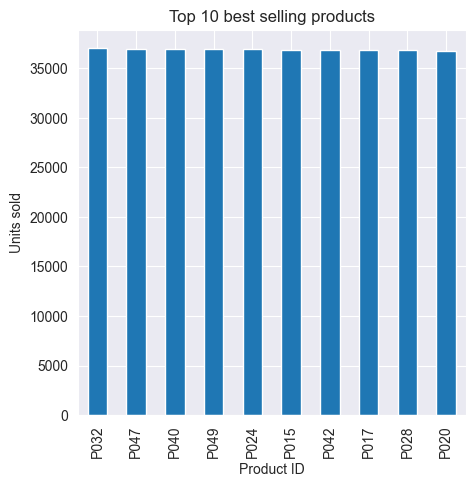

In [4]:
top_products = df.groupby('product_id')['units_sold'].sum().sort_values(ascending = False).head(10)
print(top_products)
print(" ")

top_products.plot(kind='bar', figsize = (5,5), title = 'Top 10 best selling products')
plt.xlabel('Product ID')
plt.ylabel('Units sold')
plt.show()

region
North      202428324
Central    201809836
West       200503171
East       200253028
South      200247137
Name: revenue, dtype: int64
 


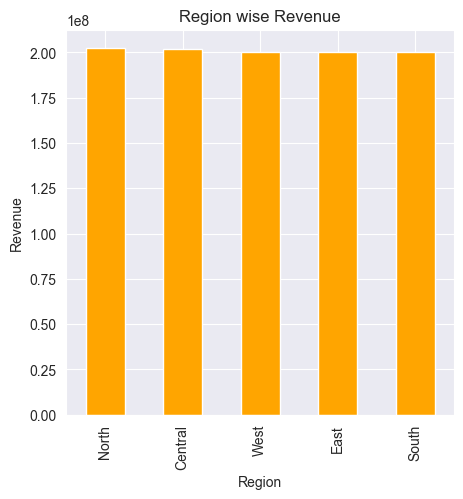

In [5]:
region_revenue = df.groupby('region')['revenue'].sum().sort_values(ascending = False)
print(region_revenue)
print(" ")
region_revenue.plot(kind='bar', color = 'orange', figsize = (5,5), title = 'Region wise Revenue')
plt.xlabel('Region')
plt.ylabel('Revenue')
plt.show()

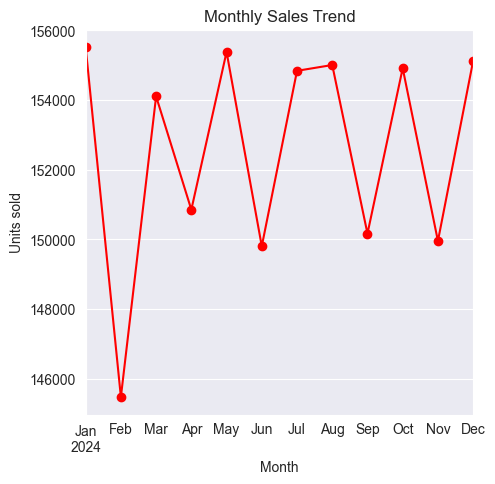

In [6]:
df['month'] = df['date'].dt.to_period('M')

monthly_sales = df.groupby('month')['units_sold'].sum()

monthly_sales.plot(kind = 'line', marker = 'o', color = 'red', figsize = (5,5), title = 'Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Units sold')
plt.show()

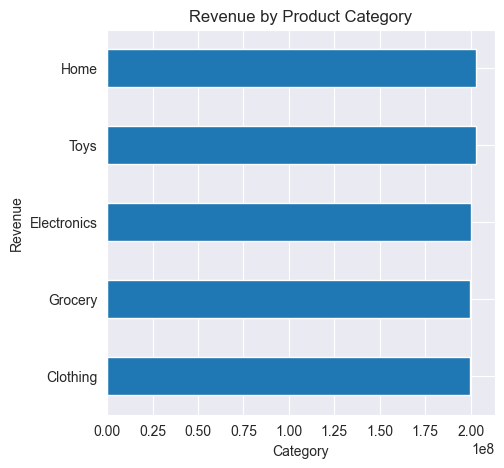

In [7]:
category_revenue = df.groupby('category')['revenue'].sum().sort_values()

category_revenue.plot(kind = 'barh', figsize = (5,5), title = 'Revenue by Product Category')
plt.xlabel('Category')
plt.ylabel('Revenue')
plt.show()

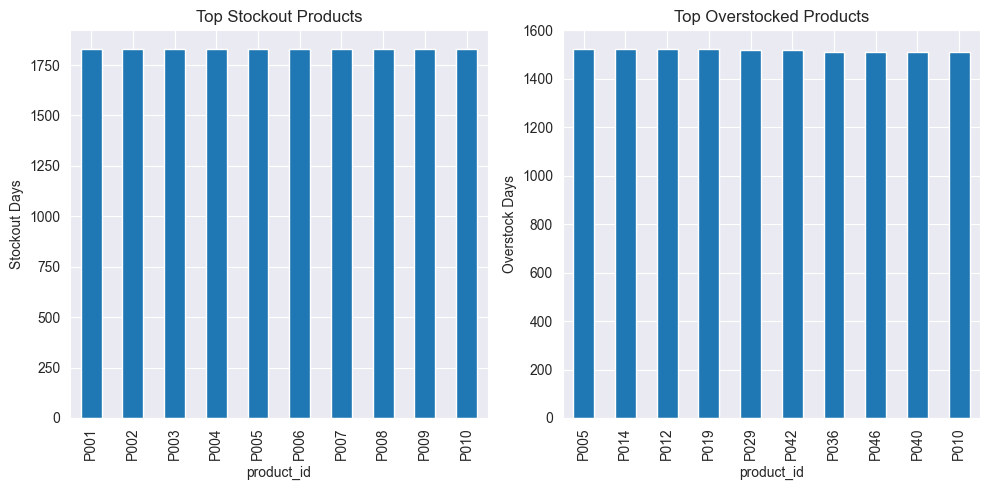

In [8]:
#stockout
stockouts = df[(df['inventory_level'] > 0) & (df['units_sold'] > 0)]
stockouts_summary = stockouts.groupby('product_id').size().sort_values(ascending = False).head(10)

#overstock
df['overstock_flag'] = df['inventory_level'] > (df['units_sold'] * 3)
overstock_summary = df[df['overstock_flag']].groupby('product_id').size().sort_values(ascending = False).head(10)

fig, axes = plt.subplots(1,2, figsize = (10,5))

stockouts_summary.plot(kind = 'bar', ax = axes[0], title = 'Top Stockout Products')
axes[0].set_ylabel('Stockout Days')

overstock_summary.plot(kind = 'bar', ax = axes[1], title = 'Top Overstocked Products')
axes[1].set_ylabel('Overstock Days')

plt.tight_layout()
plt.show()

In [9]:
df['month'] = df['date'].dt.to_period('M')

monthly_turnover = df.groupby(['month','product_id']).agg({
    'units_sold': 'sum',
    'inventory_level': 'mean'
}).reset_index()

monthly_turnover['turnover_ratio'] = monthly_turnover['units_sold'] / monthly_turnover['inventory_level']

12:05:43 - cmdstanpy - INFO - Chain [1] start processing
12:05:43 - cmdstanpy - INFO - Chain [1] done processing


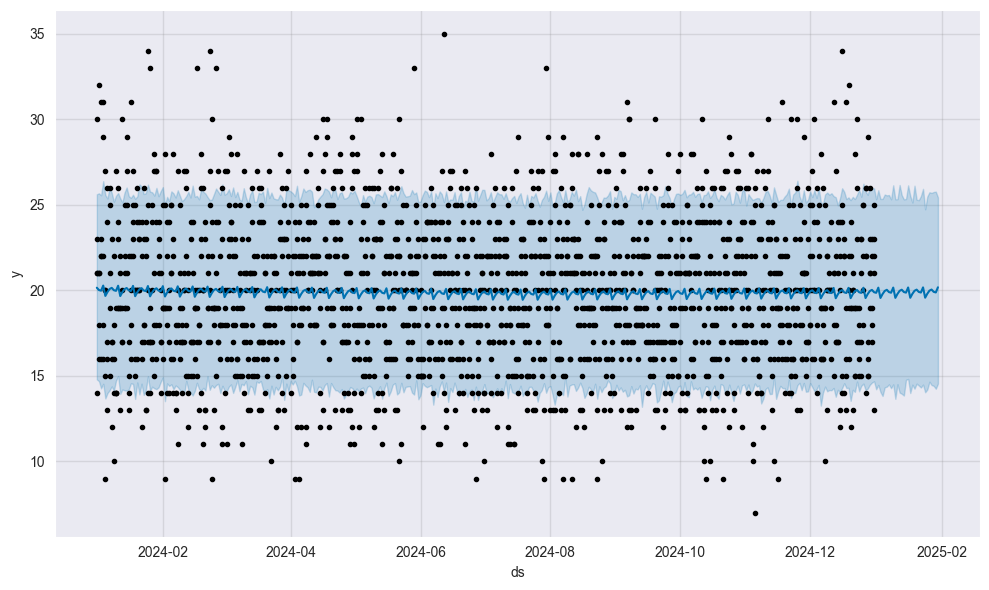

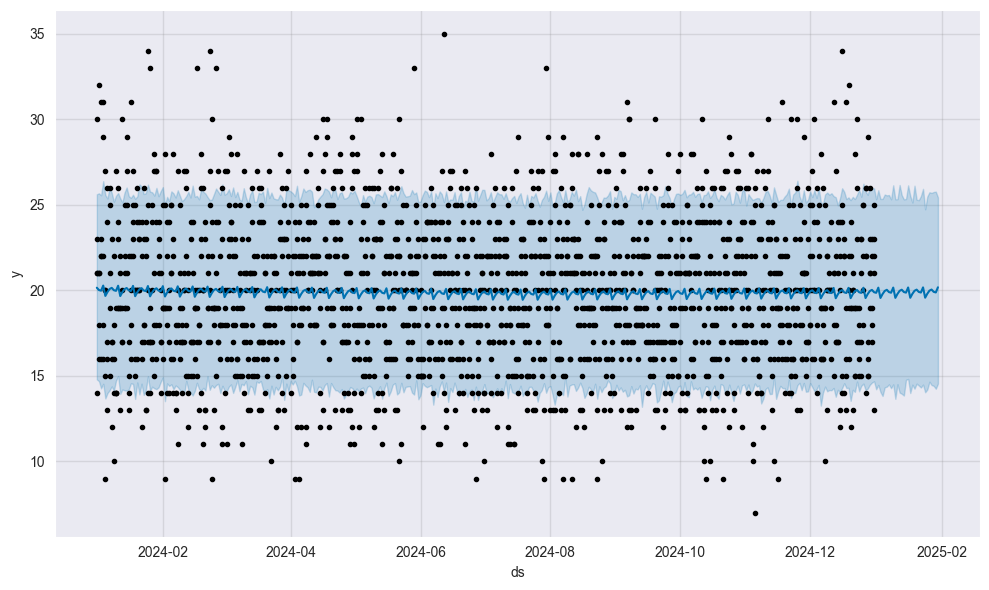

In [19]:
from prophet import Prophet
product_df = df[df['product_id'] == 'P001'][['date', 'units_sold']]
product_df = product_df.rename(columns = {'units_sold' : 'y', 'date' : 'ds'})

model = Prophet()
model.fit(product_df)

future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)
model.plot(forecast)